In [16]:
import pandas as pd
import matplotlib.pylab as plt

In [18]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [32]:
df = pd.read_csv("usedcars.csv", names=headers)

head() pour voir les 5 premieres lignes

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#Convert "?" to NaN

In [34]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Evaluation des donnees manquantes

In [35]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Compter les valeurs manquants sur chaque colonne

In [36]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

# Base sur ce resume ci dessus le nombre total de colonnes est 205
"normalized-losses": 41 donnees manquantes

"num-of-doors": 2 donnees manquantes

"bore": 4 donnees manquantes

"stroke" : 4 donnees manquantes

"horsepower": 2 donnees manquantes

"peak-rpm": 2 donnees manquantes

"price": 4 donnees manquantes

# Decision sur les valeurs manquants
Suprimer
a. suprimer l'ensemble des lignes
b. suprimer l'ensemble des colonnes
Remplacer la donnee
a. Remplacer la par la moyenne
b. Remplacer la par la frequence
c. Remplacer la en se basant sur d'autres fonctions


On doit supprimer la colonne uniquement si le nombre de cellules de données qu’elle contient est inférieur au nombre de cellules manquantes, ce qui n’est pas notre cas ici.

<b>Remplaçons par la moyenne:</b>

"normalized-losses": 41 donnees manquantes, les remplacer par moyenne

"stroke": 4 donnees manquantes, rles remplacer par moyenne

"bore": 4 donnees manquantes, les remplacer par moyenne

"horsepower": 2 donnees manquantes, les remplacer par moyenne

"peak-rpm": 2 donnees manquantes, les remplacer par moyenne


Remplaçons par la frequence:

"num-of-doors" : 2 valeurs manquantes, les remplacer par "quatre".

Raison : 84 % des berlines ont quatre portes. Comme quatre portes est la valeur la plus fréquente, c’est celle qui est la plus susceptible de se produire.

Supprimer la ligne :

"price" : 4 valeurs manquantes, supprimer simplement toute la ligne.

Raison : Vous voulez prédire le prix. Vous ne pouvez pas utiliser une ligne sans valeur pour le prix dans la prédiction ; par conséquent, toute ligne maintenant sans valeur de prix n’est pas utile.

### Calculons la moyenne de normalized-losses

In [40]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


### Remplaçons NAN par la moyenne dans la colonne normalized-losses

In [41]:
# ces 3 lignes suivantes permettent de faire NAN par la moyenne de cette colonne calculer
#df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
#df["normalized-losses"].fillna(avg_norm_loss, inplace=True)
#df["normalized-losses"] = df["normalized-losses"].fillna(avg_norm_loss)

df.fillna({"normalized-losses": avg_norm_loss}, inplace=True)

### Calculons la moyenne de bore

In [42]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


### Remplaçons NAN par la moyenne dans la colonne bore

In [43]:
#df["bore"].replace(np.nan, avg_bore, inplace=True)
df.fillna({"bore": avg_bore}, inplace = True)

### Calculons la moyenne de stroke

In [44]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


### Remplaçons NAN par la moyenne dans la colonne stroke

In [45]:
#df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df.fillna({"stroke": avg_stroke}, inplace = True)

### Calculons la moyenne de cette colonne "horsepower" et remplacer NAN par cette valeur dans toutes les cellules de horsepower 

In [46]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

#df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df.fillna({'horsepower': avg_horsepower}, inplace = True)

Average horsepower: 104.25615763546799


### Remplacons les valeurs manquantes par peak-rpm

In [49]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

#df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df.fillna({'peak-rpm': avg_peakrpm}, inplace = True)

Average peak rpm: 5125.369458128079


### Cherchons la valeurs la plus frequentes dans la colonnes "num-of-doors"

In [50]:
df['num-of-doors'].value_counts()
# ou df['num-of-doors'].value_counts().idxmax()

num-of-doors
four    114
two      89
Name: count, dtype: int64

### Meme methode de remplacement que nous avons vu tout à l'heure

In [51]:
#replace the missing 'num-of-doors' values by the most frequent 
#df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.fillna({"num-of-doors": "four"}, inplace = True)
print(df["num-of-doors"].isna().sum())

0


### Supprimons l'ensemble des lignes vides dans la colonne price

In [52]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [53]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Good! Now, you have a data set with no missing values.
### Corrigeons le format de donnee

#### .dtype() 

#### .astype() 


###### pour voir le type de donnee

In [54]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Comme vous pouvez le voir ci-dessus, certaines colonnes n’ont pas le type de données correct. Les variables numériques devraient être de type float ou int, et les variables contenant des chaînes de caractères, comme les catégories, devraient être de type object. Par exemple, les valeurs numériques bore et stroke décrivent les moteurs, donc vous devriez vous attendre à ce qu’elles soient de type float ou int ; cependant, elles apparaissent comme de type object. Vous devez convertir les types de données dans un format approprié pour chaque colonne en utilisant la méthode astype().

In [55]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [60]:
#Verifions notre conversion
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Wonderful!

### Now you finally obtained the cleansed data set with no missing values and with all data in its proper format.

Vous collectez généralement des données provenant de différentes agences sous différents formats.
(La standardisation des données est également un terme désignant un type particulier de normalisation des données où l’on soustrait la moyenne et divise par l’écart-type.)

**Qu’est-ce que la standardisation ?**
La standardisation est le processus de transformation des données dans un format commun, permettant au chercheur de faire des comparaisons significatives.

**Exemple**
Transformer mpg en L/100km :
Dans votre jeu de données, les colonnes de consommation de carburant « city-mpg » et « highway-mpg » sont exprimées en mpg (miles par gallon). Supposons que vous développiez une application dans un pays qui utilise la norme L/100km pour la consommation de carburant.
Vous devrez appliquer une **transformation des données** pour convertir mpg en L/100km.


In [61]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [62]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


##### Pour highway-mpg

In [63]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


# Normalisation des données
Pourquoi la normalisation ?
La normalisation est le processus de transformation des valeurs de plusieurs variables afin qu’elles se situent dans une plage similaire. Les normalisations typiques incluent :

Mettre l’échelle de la variable de sorte que la moyenne soit 0

Mettre l’échelle de la variable de sorte que la variance soit 1

Mettre l’échelle de la variable de sorte que les valeurs de la variable varient de 0 à 1

Exemple
Pour illustrer la normalisation, supposons que vous souhaitez mettre à l’échelle les colonnes « length », « width » et « height ».

Objectif : normaliser ces variables afin que leurs valeurs varient de 0 à 1

Approche : remplacer la valeur originale par (valeur originale) / (valeur maximale)

In [73]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

# Normalisons height

In [74]:
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Regroupement (Binning)

Pourquoi le binning ?
Le binning est un processus qui consiste à transformer des variables numériques continues en « bins » (catégories discrètes) pour une analyse regroupée.

Exemple :
Dans votre jeu de données, « horsepower » est une variable à valeurs réelles allant de 48 à 288 et elle possède 59 valeurs uniques. Supposons que vous vous intéressiez uniquement à la différence de prix entre les voitures à forte puissance, puissance moyenne et faible puissance (3 types). Vous pouvez les regrouper en trois « bins » pour simplifier l’analyse.

Convertissons la donnee dans un format correcte


In [76]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Voyons la distribution dans un graphe

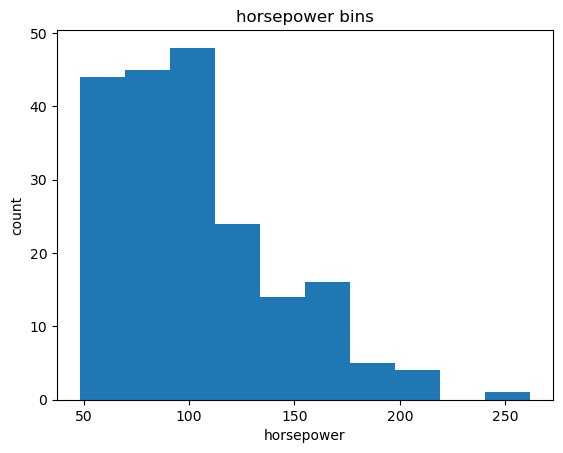

In [100]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

plt.pyplot.show()

Trouvez 3 bins de largeur égale en utilisant la fonction linspace(start_value, end_value, numbers_generated) de Numpy.

Comme vous voulez inclure la valeur minimale de « horsepower », fixez start_value = min(df["horsepower"]).

Comme vous voulez inclure la valeur maximale de « horsepower », fixez end_value = max(df["horsepower"]).

Comme vous créez 3 bins de longueur égale, vous avez besoin de 4 diviseurs, donc numbers_generated = 4.


Créez un tableau de bins allant de la valeur minimale à la valeur maximale en utilisant la largeur de bin calculée ci-dessus. Ces valeurs détermineront où un bin se termine et où le suivant commence.


In [81]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])



Définir les noms des groupes :


In [82]:
group_names = ['Low', 'Medium', 'High']


Appliquez la fonction `cut` pour déterminer à quel bin appartient chaque valeur de `df['horsepower']`.


In [83]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Voir le nombre de véhicules dans chaque bin :

In [84]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Voyons la distribution dans un graphe

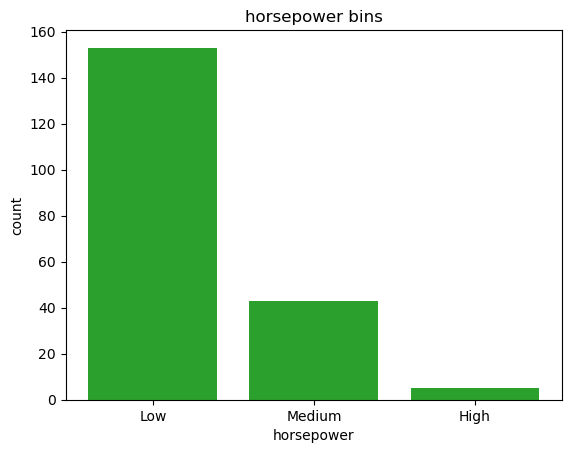

In [99]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

plt.pyplot.show()

Visualisation de bin

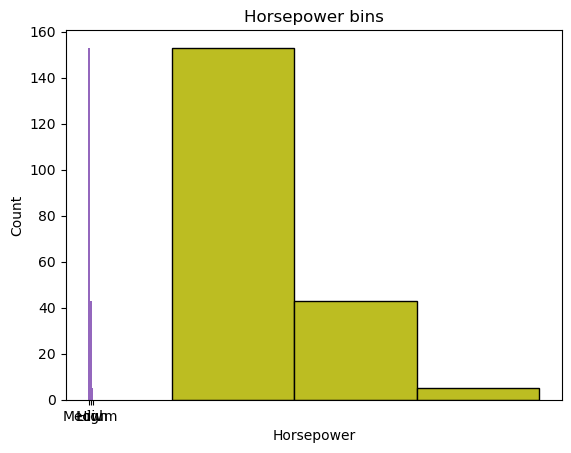

In [96]:
%matplotlib inline


# Dessiner un histogramme de "horsepower" avec 3 bins
plt.hist(df["horsepower"], bins=3, edgecolor="black")

# Ajouter labels et titre
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower bins")

plt.show()


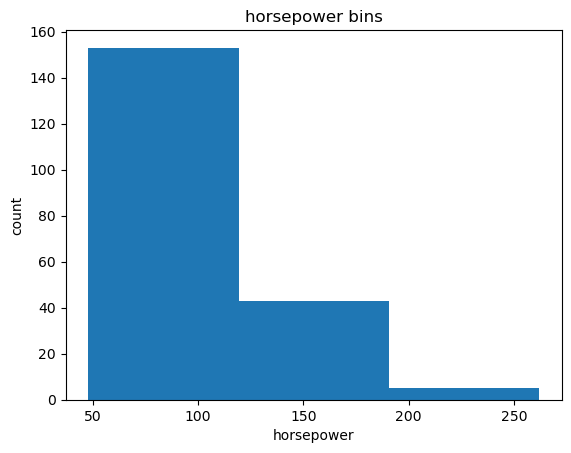

In [101]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


plt.pyplot.show()

Variable indicatrice

Qu’est-ce qu’une variable indicatrice ?
Une variable indicatrice (ou variable fictive dummy) est une variable numérique utilisée pour représenter des catégories. On les appelle « fictives » car les nombres eux-mêmes n’ont pas de signification intrinsèque.

Pourquoi utiliser des variables indicatrices ?
On utilise les variables indicatrices afin de pouvoir employer des variables catégorielles dans une analyse de régression.

Exemple
La colonne « fuel-type » contient deux valeurs uniques : « gas » ou « diesel ». La régression ne comprend pas les mots, uniquement les nombres. Pour utiliser cet attribut dans une analyse de régression, vous pouvez convertir « fuel-type » en variables indicatrices.

Utilisez la méthode Pandas get_dummies pour attribuer des valeurs numériques aux différentes catégories de type de carburant.

In [102]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Obtenez les variables indicatrices et assignez-les au DataFrame dummy_variable_1 :

In [103]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Changer les noms des colonnes pour plus de clarté :

In [109]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Dans le DataFrame, la colonne « fuel-type » a maintenant des valeurs pour « gas » et « diesel » sous forme de 0 et 1.

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [111]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,8.703704,13495.0,11.190476,Low,False,True,False,True,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,8.703704,16500.0,11.190476,Low,False,True,False,True,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.038462,16500.0,12.368421,Medium,False,True,False,True,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,7.833333,13950.0,9.791667,Low,False,True,False,True,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,10.681818,17450.0,13.055556,Low,False,True,False,True,False,True


Pour "aspiration"

In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

In [ ]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

# Enregistrer le nouveau csv

In [118]:
df.to_csv('clean_df.csv')

In [119]:
jupyter nbconvert --to docx mon_notebook.ipynb

SyntaxError: invalid syntax (3472798851.py, line 1)